<a href="https://colab.research.google.com/github/nallalasaiarun/ideal-giggle/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UCI Heart Disease Dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      2   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        0      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6

Con

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


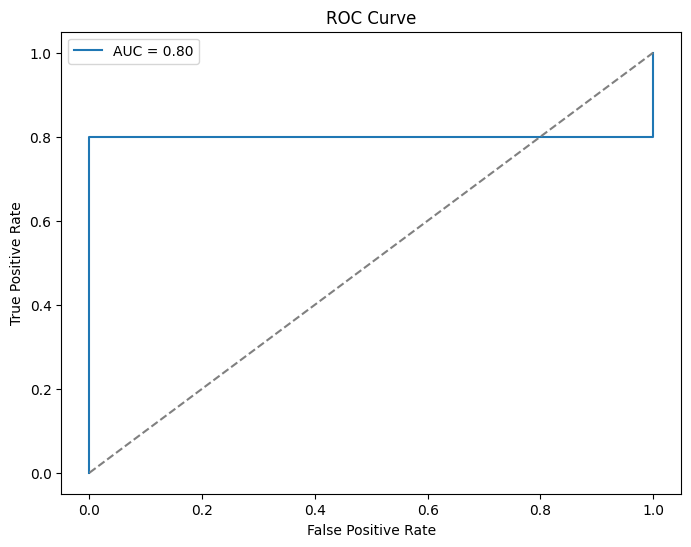


Feature Importances:
     Feature  Importance
0        age    0.245031
12      thal    0.138712
4       chol    0.124373
8      exang    0.116948
7    thalach    0.114072
9    oldpeak    0.063266
2         cp    0.055567
3   trestbps    0.047842
10     slope    0.037866
6    restecg    0.035637
1        sex    0.017645
5        fbs    0.003042
11        ca    0.000000


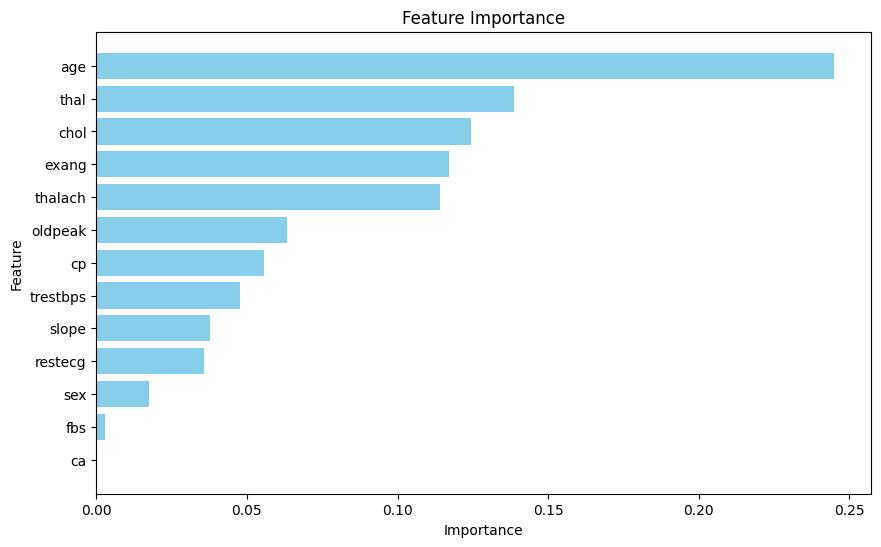

    age sex   heart_condition
0    63   M     Heart Disease
1    37   M     Heart Disease
2    41   F     Heart Disease
3    56   M     Heart Disease
4    57   F     Heart Disease
5    57   M     Heart Disease
6    56   F     Heart Disease
7    44   M     Heart Disease
8    52   M     Heart Disease
9    57   F     Heart Disease
10   54   M     Heart Disease
11   48   F     Heart Disease
12   49   M     Heart Disease
13   64   M     Heart Disease
14   58   M     Heart Disease
15   50   M     Heart Disease
16   58   F     Heart Disease
17   66   M  No Heart Disease
18   43   F     Heart Disease
19   69   M  No Heart Disease


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Load Dataset
data = {
    "age": [63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, 50, 58, 66, 43, 69],
    "sex": ["M", "M", "F", "M", "F", "M", "F", "M", "M", "F", "M", "F", "M", "M", "M", "M", "F", "M", "F", "M"],
    "cp": [3, 2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 3, 2, 2, 2, 0, 2, 1],
    "trestbps": [145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, 130, 110, 150, 120, 135, 150, 150, 140],
    "chol": [233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266, 211, 283, 219, 223, 226, 247, 239],
    "fbs": [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "restecg": [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    "thalach": [150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171, 144, 162, 158, 173, 114, 177, 151],
    "exang": [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
    "oldpeak": [2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, 0.6, 1.8, 1.0, 1.6, 1.2, 2.6, 0.1, 1.8],
    "slope": [0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1],
    "ca": [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "thal": [1, 2, 2, 2, 2, 1, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3],
    "target": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Convert 'sex' column to numeric (M -> 1, F -> 0)
df['sex'] = df['sex'].map({'M': 1, 'F': 0})

# Display the first few rows of the dataset
print("UCI Heart Disease Dataset:")
print(df.head())

# Step 2: Preprocessing
X = df.drop("target", axis=1)  # Features
y = df["target"]  # Target

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train the Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Step 5: Evaluate the Model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 6: Feature Importance
importances = model.feature_importances_
features = df.drop("target", axis=1).columns

importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

# Create a new column 'heart_condition'
df['heart_condition'] = df['target'].map({0: 'No Heart Disease', 1: 'Heart Disease'})

# Convert 'sex' column back to M/F for display
df['sex'] = df['sex'].map({1: 'M', 0: 'F'})

# Display the DataFrame with the new column and modified 'sex'
print(df[['age', 'sex', 'heart_condition']])